<a href="https://colab.research.google.com/github/emerymoriconi/deep-learning/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install tensorflow

In [14]:
!pip install keras

In [15]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'



> **ANOTAÇÕES TEÓRICAS:**


Neurônio artificial: Entradas * Pesos = Função soma -> Função de ativação.

Funcionamento básico de uma rede neural:

1. Multiplica as entradas pelos pesos

2. Faz o somatório

3. Aplica uma função de ativação (evita que o resultado seja dentro de um intervalo muito grande).

4. De acordo com uma certa condição, ele toma uma decisão.   

Multicamada é necessária quando o problema não é linearmente separável (Ex: XOR).

**IMPORTANTE:** Inicialmente os pesos e o bias são iniciados aleatoriamente. São eles quem a Inteligência Artificial terá que descobrir.

ERRO = resposta esperada - resposta encontrada.

A aprendizagem em uma rede neural é encontrar o melhor conjunto de pesos com base no cálculo dos erros.

Quanto menor o valor do erro encontrado, melhor é o valor escolhido para os pesos. Após o cálculo do erro médio, existem algoritmos que servem para ajustar o melhor conjunto de pesos para o problema.

Trabalho básico de uma rede neural: *calcula o erro -> ajusta os pesos -> calcula o erro -> ajusta os pesos -> calcula o erro -> ajusta...* (e assim por diante até que o erro seja o menor possível).

**Descida do Gradiente:** atualiza-se os pesos e nisso estamos buscando a descida do gradiente até encontrarmos o menor valor possível para o erro.

```
min C(w1, w2, w3 ... wn)
```
**Custo mínimo** ou **LossFunction** (função de perda): é a maneira como a rede neural faz a atualização dos pesos. Calcula-se a derivada parcial para mover na direção do gradiente.


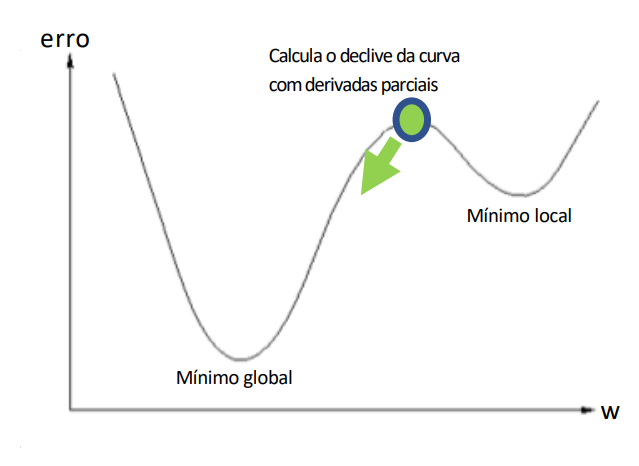

O cálculo do gradiente irá fazer os pesos (w) se deslocarem até o mínimo global da função, onde o erro será o menor possível.

Algoritmo de atualização dos pesos:


1.   Função de ativação (aplicada no valor da soma);


> as funções de ativação são importantes para fazer a transferência dos valores de uma parte da rede neural para outra parte da rede, utilizada para determinar a saída do neurônio.


2.   Derivada da função;

1.   Delta;
2.   Gradiente (indica qual direção deve ser seguida).

**Delta da camada de saída:** Erro * Derivada da função.

**Delta da camada oculta:** Derivada da função * Peso * Delta da camada de saída (serão encontrados valores de delta diferentes para cada neurônio da camada oculta).

Algoritmo *backpropagation* (algoritmo de ajuste dos pesos):



```
peso(n+1) = (peso(n) * momento) + (entrada * delta * taxa de aprendizagem)
```


> Peso (n+1): peso da próxima iteração (atualizado).


> Momento: parâmetro auxiliar que "acelera" ou otimiza o processo da descida do gradiente para encontrarmos o mínimo global.

O algorimo é chamado de *backpropagation* pois os valores chegam na camada de saída e depois do cálculo do erro, os pesos vão sendo atualizados da camada de saída até a camada de entrada (para trás).










> **Outros tópicos importantes:**



**Bias:** neurônio adicional ligado aos outros neurônios. As bibliotecas já vêm com essa unidade de *bias* pré-configurada. Apenas muda a saída para evitar que o resultado tenha sempre o mesmo valor.

Outras maneiras de calcular o erro (formas mais robustas): MSE - mean square error, RMSE - root mean square error.

**SGD (Stochastic Gradient Descent):** Calcula o erro para cada registro e atualiza os pesos.

**GD (Descida do Gradiente):** A descida do gradiente estocástica (**SGD**) ajuda a prevenir mínimos locais (superfícies não convexas) e é mais rápido por não precisar carregar todos os dados em memória. O **MBGD** (Mini batch gradient descent) escolhe um número de registros para rodar e atualizar os pesos.

**Épocas:** número de atualizações de pesos que serão realizadas.




> **Funções de ativação:**



1.   Step Function (função degrau)

  Valor 0 ou 1.





In [16]:
import numpy as np
#também chamada de transfer function

def stepFunction(soma):
  if (soma >= 1):
    return 1
  return 0

teste = stepFunction(-1)



> **Funções de ativação:**


1.   Sigmoid (função sigmoide)

  Valor 0 ou 1. Utilizada em problemas de classificação binária.





In [17]:
import numpy as np

def sigmoidFunction(soma):
  return 1 / (1 + np.exp(-soma))

teste = sigmoidFunction(2.1)
print(teste)

0.8909031788043871


> **Funções de ativação:**


1.   Hyperbolic tanget (função tangente hiperbólica)

  Valores entre -1 e 1.

In [18]:
import numpy as np

def thanFunction(soma):
  return (np.exp(soma) - np.exp(-soma)) / (np.exp(soma) + np.exp(-soma))

teste = thanFunction(2.1)
print(teste)

0.9704519366134541


> **Funções de ativação:**


1.   ReLu (Rectified Linear Units)

  Valores 0 ou > 0. Não existe um valor máximo a ser retornado. Função mais utilizada atualmente, principalmente nas CNN's.

  Obs: redes neurais profundas são aquelas que utilizam um número maior de camadas.

In [19]:
import numpy as np

def reluFunction(soma):
  if soma >= 0:
    return soma
  return 0

teste = reluFunction(2.1)
print(teste)

2.1


> **Funções de ativação:**


1.   Linear (função linear)

  Retorna o valor passado. Não faz nada, muito utilizada em problemas de regressão.

In [20]:
import numpy as np

def linearFunction(soma):
  return soma

> Funções de ativação:



1.   Softmax

    Utilizada quando existem muitas classes. Retorna probabilidades para cada uma das classes e a maior delas é a resposta final.

In [21]:
import numpy as np

#recebe um vetor de valores de cada uma das classes
#aplicada na camada de saída
def softmaxFunction(x):
  ex = np.exp(x)
  return ex / ex.sum()

#exemplo de valores que foram retornados na camada de saída
#probabilidades serão associadas à cada um deles
#quanto maior o valor, maior a probabilidade (pega o máximo)
valores = [5.0, 2.0, 1.3]
print(softmaxFunction(valores))

[0.93065625 0.04633465 0.0230091 ]


**Breast Cancer - Atividade de classificação binária**


**Classe_teste e Previsores_teste**: importantes para avaliar o desempenho da rede neural que está sendo utilizada.

**Sequential no Keras**: classe que será utilizada durante todo o curso para a criação da rede neural (sequência de camadas).

**Dense no Keras**: serão utilizadas camadas densas na rede neural (cada um dos neurônios é ligado a todos os outros neurônios da camada oculta).



> Criando a rede neural:



```
classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer='random_uniform', input_dim = 30))
```



1.   Units = 16: número de neurônios da camada oculta (segue a fórmula: [entradas + saídas] / 2);
2.   Activation = 'relu': usa a função de ativação ReLu;
1.   Kernel_initializer: inicializa os pesos aleatoriamente;
2.   Input_dim: tamanho da camada de entrada (são 30 classes). Só é colocada na primeira camada oculta, parâmetro desnecessário nas camadas ocultas seguintes.





In [22]:
import pandas as pd

#atributos previsores
previsores = pd.read_csv('entradas_breast.csv')
#respostas (onde queremos chegar, o que queremos prever)
classe = pd.read_csv('saidas_breast.csv')

#função automática da biblioteca Sklearn que faz uma divisão da base de dados entre treinamento e teste
from sklearn.model_selection import train_test_split
#teste_size indica qual porcentagem da base de dados será usada para fazer os testes
#nesse caso será 25% para teste e 75% para treinamento
#problema de classificação binária: 0 (câncer benigno) ou 1 (câncer maligno)
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)

#construção da rede neural
import keras
from keras.models import Sequential
#serão utilizadas camadas densas na rede neural
from keras.layers import Dense
classificador = Sequential()
classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer='random_uniform', input_dim = 30))
#adicionando mais uma camada oculta na minha rede
classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer='random_uniform'))
#construindo a camada de saída (apenas 1 neurônio) e a função de ativação usada é a sigmoid por ser um problema de classificação binária(0 ou 1)
classificador.add(Dense(units = 1, activation = 'sigmoid'))
#compilamos a rede neural
#optimizer=adam: otimizador da descida do gradiente estocástica
#loss=binary_crossentropy: cálculo do erro
#também podemos customizar o otimizador pois ele sempre vem com as configurações default
otimizador = keras.optimizers.Adam(learning_rate = 0.001, weight_decay = 0.0001, clipvalue = 0.5)
classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
#treinamento efetivo da rede neural
#batch_size: ajusta os pesos após o cálculo de erro a cada 10 registros
classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 10, epochs = 100)

#conjunto de pesos que a rede neural consegue aprender
#como fazemos a visualização dos pesos? por meio das camadas (layers)
pesos0 = classificador.layers[0].get_weights()
pesos1 = classificador.layers[1].get_weights()
pesos2 = classificador.layers[2].get_weights()

#teste de acurácia sobre base de dados correta (a base de teste)
previsoes = classificador.predict(previsores_teste)
#para ela devolver valores de 0 ou 1 (arredondamento) e podermos comparar com as saídas
previsoes = (previsoes > 0.5)

#comparativo entre as saídas esperadas e as saídas adquiridas na base de dados de teste
from sklearn.metrics import confusion_matrix, accuracy_score
#passa como parâmetro os valores que queremos comparar
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
#tumores malignos classificados como benignos (o que queremos que seja o menor possível) ou malignos, tumores benignos classificados como benignos ou malignos
#essa mesma comparação pode ser feita usando o Keras
resultado = classificador.evaluate(previsores_teste, classe_teste)

Epoch 1/100
43/43 [==============================] - 2s 9ms/step - loss: 1.0976 - binary_accuracy: 0.5775
Epoch 2/100
43/43 [==============================] - 0s 7ms/step - loss: 0.5439 - binary_accuracy: 0.6667
Epoch 3/100
43/43 [==============================] - 0s 9ms/step - loss: 0.4688 - binary_accuracy: 0.7394
Epoch 4/100
43/43 [==============================] - 0s 9ms/step - loss: 0.4822 - binary_accuracy: 0.7394
Epoch 5/100
43/43 [==============================] - 0s 10ms/step - loss: 0.4622 - binary_accuracy: 0.7347
Epoch 6/100
43/43 [==============================] - 0s 11ms/step - loss: 0.4703 - binary_accuracy: 0.7864
Epoch 7/100
43/43 [==============================] - 0s 9ms/step - loss: 0.4694 - binary_accuracy: 0.8099
Epoch 8/100
43/43 [==============================] - 0s 10ms/step - loss: 0.4600 - binary_accuracy: 0.8052
Epoch 9/100
43/43 [==============================] - 0s 9ms/step - loss: 0.5417 - binary_accuracy: 0.7535
Epoch 10/100
43/43 [=======================

**Avaliação de um algoritmo**

Para fazer a avaliação de um algortimo, são necessárias duas bases de dados diferentes: a de treinamento e a de teste. Com a base de treinamento, uma tabela de probabilidade é gerada e depois é comparada com a base de teste para que comparações e previsões possam ser feitas. Porém, algumas vezes a base escolhida para ser de teste poderia apresentar melhores resultados (serem previsores melhores, com melhores generalizações) se fosse utilizada como base de dados de treinamento. É utilizada então a **K-fold Cross Validation** ou Validação Cruzada.

Todos os registros então são utilizados para treinamento e para teste, mesmo ainda tendo bases de dados separadas para teste e treinamento. A depender do valor escolhido para **K** (K = 10 é o mais utilizado pela comunidade científica), a base de dados é "quebrada" em **K** pedaços e ora um fold se comporta como base para teste (apenas um é escolhido por vez), ora se comporta como base para treinamento. Em seguida, é realizada a média dos resultados para cada fold e este é o acerto do algoritmo em questão.

In [23]:
!pip install scikeras

In [24]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
#importações para fazermos a validação cruzada
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

previsores = pd.read_csv('entradas_breast.csv')
classe  = pd.read_csv('saidas_breast.csv')

#função para criar rede
def criarRede():
  classificador = Sequential()
  classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer='random_uniform', input_dim = 30))
  classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer='random_uniform'))
  classificador.add(Dense(units = 1, activation = 'sigmoid'))
  otimizador = keras.optimizers.Adam(learning_rate = 0.001, weight_decay = 0.0001, clipvalue = 0.5)
  classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
  return classificador

classificador = KerasClassifier(build_fn = criarRede,
                                epochs = 100,
                                batch_size = 10)

#faz a validação cruzada com K = 10
#vai executar 10 vezes, cv = K = 10
resultados = cross_val_score(estimator = classificador,
                             X = previsores, y = classe,
                             cv = 10, scoring = 'accuracy')


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
52/52 [==============================] - 1s 2ms/step - loss: 1.0312 - binary_accuracy: 0.6055
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4874 - binary_accuracy: 0.7363
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4728 - binary_accuracy: 0.7734
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4402 - binary_accuracy: 0.8027
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4607 - binary_accuracy: 0.8008
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3894 - binary_accuracy: 0.8184
Epoch 7/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3469 - binary_accuracy: 0.8496
Epoch 8/100
52/52 [==============================] - 0s 5ms/step - loss: 0.3345 - binary_accuracy: 0.8809
Epoch 9/100
52/52 [==============================] - 0s 6ms/step - loss: 0.4037 - binary_accuracy: 0.8457
Epoch 10/100
52/52 [==========================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 3ms/step - loss: 0.8377 - binary_accuracy: 0.5684
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5659 - binary_accuracy: 0.6875
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5079 - binary_accuracy: 0.7070
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4569 - binary_accuracy: 0.8008
Epoch 5/100
52/52 [==============================] - 0s 4ms/step - loss: 0.4259 - binary_accuracy: 0.8066
Epoch 6/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4724 - binary_accuracy: 0.7891
Epoch 7/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3753 - binary_accuracy: 0.8125
Epoch 8/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3357 - binary_accuracy: 0.8633
Epoch 9/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3362 - binary_accuracy: 0.8613
Epoch 10/100
52/52 [==============================] - 0s 3

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 2ms/step - loss: 1.0891 - binary_accuracy: 0.6094
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4669 - binary_accuracy: 0.7715
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5101 - binary_accuracy: 0.7598
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5203 - binary_accuracy: 0.7949
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4356 - binary_accuracy: 0.8281
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3938 - binary_accuracy: 0.8359
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3704 - binary_accuracy: 0.8477
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3831 - binary_accuracy: 0.8477
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4102 - binary_accuracy: 0.8398
Epoch 10/100
52/52 [==============================] - 0s 2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 2ms/step - loss: 1.0796 - binary_accuracy: 0.5879
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5406 - binary_accuracy: 0.6367
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5097 - binary_accuracy: 0.7031
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4401 - binary_accuracy: 0.7734
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4330 - binary_accuracy: 0.7988
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4275 - binary_accuracy: 0.7910
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4977 - binary_accuracy: 0.8008
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4138 - binary_accuracy: 0.8203
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4926 - binary_accuracy: 0.8047
Epoch 10/100
52/52 [==============================] - 0s 2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 3ms/step - loss: 0.7325 - binary_accuracy: 0.6172
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5058 - binary_accuracy: 0.7168
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4475 - binary_accuracy: 0.7812
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4472 - binary_accuracy: 0.8008
Epoch 5/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3820 - binary_accuracy: 0.8262
Epoch 6/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3642 - binary_accuracy: 0.8398
Epoch 7/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3337 - binary_accuracy: 0.8672
Epoch 8/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3441 - binary_accuracy: 0.8613
Epoch 9/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3810 - binary_accuracy: 0.8633
Epoch 10/100
52/52 [==============================] - 0s 3

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
52/52 [==============================] - 1s 3ms/step - loss: 1.1039 - binary_accuracy: 0.6172
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5398 - binary_accuracy: 0.7559
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4556 - binary_accuracy: 0.7832
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5633 - binary_accuracy: 0.7793
Epoch 5/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4936 - binary_accuracy: 0.7988
Epoch 6/100
52/52 [==============================] - 0s 4ms/step - loss: 0.7468 - binary_accuracy: 0.7324
Epoch 7/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4533 - binary_accuracy: 0.8223
Epoch 8/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4805 - binary_accuracy: 0.8262
Epoch 9/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5405 - binary_accuracy: 0.8125
Epoch 10/100
52/52 [==========================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 2ms/step - loss: 0.9178 - binary_accuracy: 0.6387
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5082 - binary_accuracy: 0.7246
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5046 - binary_accuracy: 0.7383
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4563 - binary_accuracy: 0.7773
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4566 - binary_accuracy: 0.8066
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4849 - binary_accuracy: 0.8340
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4840 - binary_accuracy: 0.8242
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3723 - binary_accuracy: 0.8320
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3641 - binary_accuracy: 0.8496
Epoch 10/100
52/52 [==============================] - 0s 2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 2ms/step - loss: 0.7306 - binary_accuracy: 0.6602
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4676 - binary_accuracy: 0.7891
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5880 - binary_accuracy: 0.7363
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4770 - binary_accuracy: 0.8066
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4122 - binary_accuracy: 0.8359
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4031 - binary_accuracy: 0.8242
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3760 - binary_accuracy: 0.8633
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4371 - binary_accuracy: 0.8340
Epoch 9/100
52/52 [==============================] - 0s 4ms/step - loss: 0.3636 - binary_accuracy: 0.8594
Epoch 10/100
52/52 [==============================] - 0s 2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 2ms/step - loss: 0.7269 - binary_accuracy: 0.5879
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5434 - binary_accuracy: 0.7441
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4684 - binary_accuracy: 0.7891
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4693 - binary_accuracy: 0.8047
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4806 - binary_accuracy: 0.8047
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5448 - binary_accuracy: 0.8086
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4359 - binary_accuracy: 0.8320
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4732 - binary_accuracy: 0.8281
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6696 - binary_accuracy: 0.7812
Epoch 10/100
52/52 [==============================] - 0s 2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 2ms/step - loss: 0.7923 - binary_accuracy: 0.5828
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5657 - binary_accuracy: 0.6745
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4663 - binary_accuracy: 0.7641
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5299 - binary_accuracy: 0.7583
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4130 - binary_accuracy: 0.8499
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4328 - binary_accuracy: 0.8129
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3831 - binary_accuracy: 0.8324
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4268 - binary_accuracy: 0.8285
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4736 - binary_accuracy: 0.8187
Epoch 10/100
52/52 [==============================] - 0s 2

**Desvio-padrão:** Quanto maior, maior a tendência de que haja *Overfitting* na base de dados.

In [25]:
media = resultados.mean()
print(media)
#desvio-padrão
desvio = resultados.std()
print(desvio)

0.7909774436090224
0.056523931264202285


**Underfitting e Overfitting**



*   *Underfitting*

    Resultados ruins na base de treinamento;

    Poucos recursos para um problema complexo.

*   *Overfitting*

    Resultados bons na base de treinamento;

    Resultados ruins na base de teste;

    Muito específico;

    Memorização;

    Erros na variação de novas instâncias;

    Muitos recursos para um problema simples;


**Overfitting** acontece quando um modelo aprende os detalhes e ruídos nos
dados de treinamento. Isso significa que o ruído ou flutuações aleatórias nos dados de treinamento são captados e aprendidos como conceitos pelo modelo. O problema é que esses conceitos não se aplicam a novos dados e impactam negativamente a capacidade de generalização dos modelos (**SHORTEN; KHOSHGOFTAAR, 2019**).

A técnica de **Dropout** (**GOODFELLOW; BENGIO; COURVILLE, 2017**) consiste em
remover, aleatoriamente a cada iteração de treinamento, uma determinada porcentagem dos neurônios de uma camada, readicionando-os na iteração seguinte. Basicamente essa técnica ignora alguns neurônios durante o treinamento, ou seja,
diferentes neurônios são removidos da rede temporariamente. Assim, após cada iteração, diferentes conjuntos de neurônios são ativados, para evitar que alguns neurônios dominem o processo. Isso, portanto, nos ajuda a reduzir a ameaça de *overfitting* e permite o surgimento de arquiteturas de rede maiores e mais profundas que podem fazer boas previsões sobre dados que a rede não viu antes (**HINTON et al., 2012**).

*Obs: se o valor de Dropout for muito alto, irá ocorrer o fenômeno de Underfitting.*

In [26]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
#importações para fazermos a validação cruzada
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

previsores = pd.read_csv('entradas_breast.csv')
classe  = pd.read_csv('saidas_breast.csv')

#função para criar rede
def criarRede():
  classificador = Sequential()
  classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer='random_uniform', input_dim = 30))
  #pega 20% dos neurônios da camada de entrada e os zera
  classificador.add(Dropout(0.2))
  classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer='random_uniform'))
  #pega 20% dos neurônios da outra camada e os zera
  classificador.add(Dropout(0.2))
  classificador.add(Dense(units = 1, activation = 'sigmoid'))
  otimizador = keras.optimizers.Adam(learning_rate = 0.001, weight_decay = 0.0001, clipvalue = 0.5)
  classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
  return classificador

classificador = KerasClassifier(build_fn = criarRede,
                                epochs = 100,
                                batch_size = 10)

#faz a validação cruzada com K = 10
#vai executar 10 vezes, cv = K = 10
resultados = cross_val_score(estimator = classificador,
                             X = previsores, y = classe,
                             cv = 10, scoring = 'accuracy')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 2s 2ms/step - loss: 1.1250 - binary_accuracy: 0.5723
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6720 - binary_accuracy: 0.6445
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6054 - binary_accuracy: 0.6211
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5966 - binary_accuracy: 0.6055
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5816 - binary_accuracy: 0.6387
Epoch 6/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5676 - binary_accuracy: 0.6660
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5947 - binary_accuracy: 0.6484
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5620 - binary_accuracy: 0.6953
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5715 - binary_accuracy: 0.6777
Epoch 10/100
52/52 [==============================] - 0s 2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
52/52 [==============================] - 3s 3ms/step - loss: 1.1960 - binary_accuracy: 0.5977
Epoch 2/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6148 - binary_accuracy: 0.6855
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5492 - binary_accuracy: 0.7598
Epoch 4/100
52/52 [==============================] - 0s 5ms/step - loss: 0.5677 - binary_accuracy: 0.7402
Epoch 5/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5555 - binary_accuracy: 0.7441
Epoch 6/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5648 - binary_accuracy: 0.7480
Epoch 7/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5076 - binary_accuracy: 0.7656
Epoch 8/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5347 - binary_accuracy: 0.7930
Epoch 9/100
52/52 [==============================] - 0s 5ms/step - loss: 0.5694 - binary_accuracy: 0.7832
Epoch 10/100
52/52 [==========================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 2ms/step - loss: 0.9446 - binary_accuracy: 0.5723
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.7163 - binary_accuracy: 0.6348
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6127 - binary_accuracy: 0.6426
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6147 - binary_accuracy: 0.6426
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6181 - binary_accuracy: 0.6758
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6095 - binary_accuracy: 0.6973
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6155 - binary_accuracy: 0.6914
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6121 - binary_accuracy: 0.6816
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5878 - binary_accuracy: 0.7109
Epoch 10/100
52/52 [==============================] - 0s 2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 2ms/step - loss: 1.0670 - binary_accuracy: 0.5508
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6696 - binary_accuracy: 0.6348
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5768 - binary_accuracy: 0.6660
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5449 - binary_accuracy: 0.6660
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5359 - binary_accuracy: 0.7070
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5689 - binary_accuracy: 0.7227
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5451 - binary_accuracy: 0.7422
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6657 - binary_accuracy: 0.7148
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4955 - binary_accuracy: 0.8184
Epoch 10/100
52/52 [==============================] - 0s 2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 2ms/step - loss: 1.1065 - binary_accuracy: 0.5488
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6396 - binary_accuracy: 0.6426
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5298 - binary_accuracy: 0.7090
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5017 - binary_accuracy: 0.7383
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5553 - binary_accuracy: 0.7246
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4848 - binary_accuracy: 0.7656
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5843 - binary_accuracy: 0.7715
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5696 - binary_accuracy: 0.7695
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5043 - binary_accuracy: 0.7949
Epoch 10/100
52/52 [==============================] - 0s 2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 2ms/step - loss: 2.1941 - binary_accuracy: 0.5566
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6464 - binary_accuracy: 0.6484
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5919 - binary_accuracy: 0.6738
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6212 - binary_accuracy: 0.6777
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6083 - binary_accuracy: 0.7266
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5667 - binary_accuracy: 0.7090
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6717 - binary_accuracy: 0.7227
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6412 - binary_accuracy: 0.7402
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6554 - binary_accuracy: 0.7773
Epoch 10/100
52/52 [==============================] - 0s 2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 3ms/step - loss: 1.0639 - binary_accuracy: 0.6055
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 0.7683 - binary_accuracy: 0.6191
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6011 - binary_accuracy: 0.6523
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5839 - binary_accuracy: 0.6465
Epoch 5/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6112 - binary_accuracy: 0.6406
Epoch 6/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5492 - binary_accuracy: 0.6758
Epoch 7/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5253 - binary_accuracy: 0.6816
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5716 - binary_accuracy: 0.7051
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4878 - binary_accuracy: 0.7539
Epoch 10/100
52/52 [==============================] - 0s 2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 2ms/step - loss: 1.3198 - binary_accuracy: 0.5703
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.7339 - binary_accuracy: 0.6680
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.7000 - binary_accuracy: 0.7051
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.7275 - binary_accuracy: 0.7227
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6797
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6953
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6033 - binary_accuracy: 0.7168
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6945 - binary_accuracy: 0.7344
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5801 - binary_accuracy: 0.7344
Epoch 10/100
52/52 [==============================] - 0s 2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 2ms/step - loss: 0.9692 - binary_accuracy: 0.5723
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6262 - binary_accuracy: 0.6367
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6206 - binary_accuracy: 0.6523
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6394 - binary_accuracy: 0.6289
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5475 - binary_accuracy: 0.6973
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6864 - binary_accuracy: 0.6680
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.7527 - binary_accuracy: 0.6992
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6180 - binary_accuracy: 0.7129
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.7474 - binary_accuracy: 0.6758
Epoch 10/100
52/52 [==============================] - 0s 2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


52/52 [==============================] - 1s 2ms/step - loss: 2.2190 - binary_accuracy: 0.5536
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.8161 - binary_accuracy: 0.6355
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6774 - binary_accuracy: 0.6589
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6072 - binary_accuracy: 0.6686
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6018 - binary_accuracy: 0.7018
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6394 - binary_accuracy: 0.6940
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6167 - binary_accuracy: 0.7271
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5884 - binary_accuracy: 0.7349
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5696 - binary_accuracy: 0.7388
Epoch 10/100
52/52 [==============================] - 0s 2

Percebe-se agora que o uso do **Dropout** reduziu o *Overfitting*, já que o valor do desvio-padrão sem o **Dropout** testado anteriormente (0.06337833119842362) foi maior do que o desvio-padrão com **Dropout** testado abaixo (0.0398713041582956). Isso confere uma menor variabilidade aos resultados obtidos.

In [27]:
media = resultados.mean()
print(media)
#desvio-padrão
desvio = resultados.std()
print(desvio)

0.8910714285714286
0.03654554368213511


**Tuning ou ajuste de parâmetros**

Refazemos o código, agora deixando a cargo da importação `from sklearn.model_selection import GridSearchCV` para escolher quais serão os parâmetros mais adequados para o meu problema (otimizador, loss function, quantidade de neurônios, função de ativação e etc).

*Obs: O trecho abaixo não funcionou bem na minha máquina, algum problema com as importações e a duração da execução é bastante extensiva (em torno de 8 a 10 horas). Conclusões foram extraídas da execução na máquina do professor.*

In [28]:
from keras.src.optimizers import adam
from keras.src.backend import relu
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
#importações para fazermos a validação cruzada
from scikeras.wrappers import KerasClassifier
#faz uma pesquisa em grade para selecionar os melhores parâmetros
from sklearn.model_selection import GridSearchCV

previsores = pd.read_csv('entradas_breast.csv')
classe  = pd.read_csv('saidas_breast.csv')

def criarRede(optimizer, loss, kernel_initializer, activation, neurons):
  classificador = Sequential()
  classificador.add(Dense(units = neurons, activation = activation, kernel_initializer = kernel_initializer, input_dim = 30))
  #pega 20% dos neurônios da camada de entrada e os zera
  classificador.add(Dropout(0.2))
  classificador.add(Dense(units = neurons, activation = activation, kernel_initializer = kernel_initializer))
  #pega 20% dos neurônios da outra camada e os zera
  classificador.add(Dropout(0.2))
  classificador.add(Dense(units = 1, activation = 'sigmoid'))
  classificador.compile(optimizer = optimizer, loss = loss, metrics = ['binary_accuracy'])
  return classificador

classificador = KerasClassifier(build_fn=criarRede)

#opções de parâmetros que queremos testar
parametros = {'batch_size': [10, 30],
              'epochs': [50, 100],
              'optimizer': ['adam', 'sgd'],
              'loss': ['binary_crossentropy', 'hinge'],
              'kernel_initializer': ['random_uniform', 'normal'],
              'activation': ['relu', 'tanh'],
              'neurons': [16, 8]}

grid_search = GridSearchCV(estimator=classificador, param_grid=parametros, scoring='accuracy', cv=5)
grid_search = grid_search.fit(previsores, classe)
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_

ValueError: ignored

Agora geramos uma Rede Neural final com os parâmetros que descobrimos serem os melhores aplicáveis para a rede.

In [29]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

previsores = pd.read_csv('entradas_breast.csv')
classe  = pd.read_csv('saidas_breast.csv')

classificador = Sequential()
classificador.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'normal', input_dim = 30))
#pega 20% dos neurônios da camada de entrada e os zera
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'normal'))
#pega 20% dos neurônios da outra camada e os zera
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 1, activation = 'sigmoid'))
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
classificador.fit(previsores, classe, batch_size=10, epochs=100)

#classificação de apenas um registro específico
novo = np.array([[15.80, 8.34, 118, 900, 0.10, 0.26, 0.08, 0.134,
                  0.178, 0.20, 0.05, 1098, 0.87, 4500, 145.2, 0.005, 0.04,
                  0.05, 0.015, 0.03, 0.007, 23.15, 16.64, 178.5, 2018, 0.14, 0.185,
                  0.84, 158, 0.363]])
previsao = classificador.predict(novo)
#câncer benigno (< 0.5) ou maligno (> 0.5)
previsao = (previsao > 0.5)
print(previsao)

Epoch 1/100
57/57 [==============================] - 1s 2ms/step - loss: 3.4999 - binary_accuracy: 0.4587
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.8608 - binary_accuracy: 0.5536
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.7047 - binary_accuracy: 0.5993
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6890 - binary_accuracy: 0.5694
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6283 - binary_accuracy: 0.6731
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6819
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6101 - binary_accuracy: 0.6784
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6367 - binary_accuracy: 0.7276
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5543 - binary_accuracy: 0.7346
Epoch 10/100
57/57 [==========================

**Salvando a Rede Neural**

In [30]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout

previsores = pd.read_csv('entradas_breast.csv')
classe  = pd.read_csv('saidas_breast.csv')

classificador = Sequential()
classificador.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'normal', input_dim = 30))
#pega 20% dos neurônios da camada de entrada e os zera
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'normal'))
#pega 20% dos neurônios da outra camada e os zera
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 1, activation = 'sigmoid'))
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
classificador.fit(previsores, classe, batch_size=10, epochs=100)

Epoch 1/100
57/57 [==============================] - 1s 2ms/step - loss: 2.4835 - binary_accuracy: 0.5483
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.7902 - binary_accuracy: 0.6063
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6371 - binary_accuracy: 0.6450
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6455 - binary_accuracy: 0.6380
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5904 - binary_accuracy: 0.6714
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5692 - binary_accuracy: 0.6784
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5239 - binary_accuracy: 0.6960
Epoch 8/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5285 - binary_accuracy: 0.6766
Epoch 9/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5255 - binary_accuracy: 0.7170
Epoch 10/100
57/57 [==========================

In [31]:
classificador_json = classificador.to_json()

Estrutura salva da minha rede neural, assim não teremos que treinar a rede a cada novo registro. Seus parâmetros e sua estrutura já serão salvos.

In [32]:
classificador_json

'{"class_name": "Sequential", "config": {"name": "sequential_22", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 30], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_66_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_66", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 30], "units": 8, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "RandomNormal", "config": {"mean": 0.0, "stddev": 0.05, "seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 30]}}, {"module": "keras.laye

Agora salvamos a nossa rede neural em disco:

In [33]:
with open('classificador_breast.json', 'w') as json_file:
  json_file.write(classificador_json)

In [34]:
!pip install h5py

Salvando também os pesos da rede:

In [35]:
classificador.save_weights('classificador_breast.h5')

Agora um exemplo de como utilizar essa estrutura de rede neural salva em disco e seus respectivos pesos também já salvos anteriormente.

In [36]:
import numpy as np
from keras.models import model_from_json

arquivo = open('classificador_breast.json', 'r')
estrutura_rede = arquivo.read()
arquivo.close()

classificador = model_from_json(estrutura_rede)
classificador.load_weights('classificador_breast.h5')

novo = np.array([[15.80, 8.34, 118, 900, 0.10, 0.26, 0.08, 0.134,
                  0.178, 0.20, 0.05, 1098, 0.87, 4500, 145.2, 0.005, 0.04,
                  0.05, 0.015, 0.03, 0.007, 23.15, 16.64, 178.5, 2018, 0.14, 0.185,
                  0.84, 158, 0.363]])
previsao = classificador.predict(novo)
#câncer benigno (< 0.5) ou maligno (> 0.5)
previsao = (previsao > 0.5)

previsores = pd.read_csv('entradas_breast.csv')
classe  = pd.read_csv('saidas_breast.csv')
classificador.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

1/1 [==============================] - 0s 486ms/step


Retorna a **Loss Function** e a **Acurácia** alcançada pela minha rede neural.

In [37]:
resultado = classificador.evaluate(previsores, classe)
resultado

18/18 [==============================] - 1s 10ms/step - loss: 0.1725 - binary_accuracy: 0.9402


[0.17251764237880707, 0.940246045589447]

# BASE DE DADOS IRIS

In [38]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 955.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=96a6a400e55e6a2b346b37b426eedba663d29686b25ef4f98651fda8a362727e
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [42]:
import pandas as pd
#modelo sequencial
from keras.models import Sequential
#camadas densas
from keras.layers import Dense
from keras.utils import to_categorical

base = pd.read_csv('/content/iris.csv')
#os 4 primeiros dados são os atributos das plantas, a função iloc serve para...
#...selecionar apenas um intervalo específico
previsores = base.iloc[:, 0:4].values
#o ultimo atributo é a classe a qual a planta pertence
classe = base.iloc[:, 4].values

#transformação de atributos categóricos para atributos numéricos
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(classe)
#divisão de valores para os neurônios de saída
classe_dummy = to_categorical(classe)
# iris setosa 1 0 0
# iris virginica 0 1 0
# iris versicolor 0 0 1

from sklearn.model_selection import train_test_split

#dividindo a base entre teste (25%) e treinamento (75%)
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe_dummy, test_size=0.25)
classificador = Sequential()
#na primeira camada sempre preciso inicializar a quantidade de neurônios
#units = 4, pois são 4 atributos (comprimento da sépala, largura da sépala,
#comprimento da pétala, largura da pétala)
classificador.add(Dense(units = 4, activation = 'relu', input_dim = 4))
classificador.add(Dense(units = 4, activation = 'relu'))
#camada de saída (3 pois é um problema de classificação multiclasse,
#são 3 tipos de plantas detectadas)
#softmax é sempre utilizada em problemas de classificação com mais de duas classes
classificador.add(Dense(units = 3, activation = 'softmax'))

classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                      metrics = ['categorical_accuracy'])
#treinamento da rede
classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 10,
                  epochs = 1000)

Epoch 1/1000
12/12 [==============================] - 1s 2ms/step - loss: 1.1077 - categorical_accuracy: 0.2679
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.0718 - categorical_accuracy: 0.3036
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.0497 - categorical_accuracy: 0.3036
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.0386 - categorical_accuracy: 0.3125
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.0267 - categorical_accuracy: 0.3482
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.0147 - categorical_accuracy: 0.3661
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.0034 - categorical_accuracy: 0.4196
Epoch 8/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.9944 - categorical_accuracy: 0.4286
Epoch 9/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.9852 - categorical_accuracy:

In [43]:
#97% de acerto da base de dados de teste
resultado = classificador.evaluate(previsores_teste, classe_teste)
#matriz de confusão
previsoes = classificador.predict(previsores_teste)
previsoes = (previsoes > 0.5)
#comparar os previsores com os resultados efetivos (classe_teste)
previsoes

2/2 [==============================] - 0s 9ms/step - loss: 0.1676 - categorical_accuracy: 0.9211


2/2 [==============================] - 0s 6ms/step


array([[False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [Fa

Com a matriz de confusão, conseguimos visualizar os erros e acertos. Tivemos 1 erro na matriz de confusão abaixo.

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix

classe_teste2 = [np.argmax(t) for t in classe_teste]
previsoes2 = [np.argmax(t) for t in previsoes]

matriz = confusion_matrix(previsoes2, classe_teste2)
matriz

array([[12,  0,  0],
       [ 0, 15,  2],
       [ 0,  1,  8]])

Estrutura da rede neural mais otimizada abaixo, com valores melhores para a média e para o desvio. Dropout com 30% e otimizador 'sgd'.

In [45]:
#importações para fazermos a validação cruzada
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
#modelo sequencial
from keras.models import Sequential
#camadas densas
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

base = pd.read_csv('/content/iris.csv')
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

#transformação de atributos categóricos para atributos numéricos
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(classe)
#divisão de valores para os neurônios de saída
classe_dummy = to_categorical(classe, num_classes=3)

#função que contém a estrutura da rede neural
def criar_rede():
  classificador = Sequential()
  classificador.add(Dense(units = 4, activation = 'relu', input_dim = 4))
  classificador.add(Dropout(0.3))
  classificador.add(Dense(units = 4, activation = 'relu'))
  classificador.add(Dropout(0.3))
  classificador.add(Dense(units = 3, activation = 'softmax'))
  classificador.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy',
                        metrics = ['accuracy'])
  return classificador

#model é a função que faz a criação da rede neural
classificador = KerasClassifier(model=criar_rede, epochs=1000,
                                batch_size=10)
#cv (ou k-fold): número de divisões da validação cruzada (10 folds)
resultados = cross_val_score(estimator = classificador,
                             X = previsores, y = classe,
                             cv = 10, scoring = 'accuracy')
#por conta da validação cruzada, teremos k=10, ou seja 10 resultados, então
#faremos a média entre eles
media = resultados.mean()
#verifica se tem muito overfitting na base de dados
desvio = resultados.std()

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 503/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.8138 - accuracy: 0.6296
Epoch 504/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.8280 - accuracy: 0.6148
Epoch 505/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.7746 - accuracy: 0.6519
Epoch 506/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.8796 - accuracy: 0.6222
Epoch 507/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.8528 - accuracy: 0.6148
Epoch 508/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.8224 - accuracy: 0.6148
Epoch 509/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.8616 - accuracy: 0.6074
Epoch 510/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.8679 - accuracy: 0.6000
Epoch 511/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.7762 - accuracy: 0.6815
Epoch 512/1000
14/14 [=

O mais alto possível. Relacionado ao percentual de acerto da rede neural.

In [47]:
media

0.9533333333333334

O mais próximo de 0 possível. Relacionado ao overfitting.

In [48]:
desvio

0.09910712498212339

**Salvando a rede neural.**

In [55]:
import pandas as pd
#modelo sequencial
from keras.models import Sequential
#camadas densas
from keras.layers import Dense
from keras.utils import to_categorical

base = pd.read_csv('/content/iris.csv')
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

#transformação de atributos categóricos para atributos numéricos
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(classe)

classificador = Sequential()
classificador.add(Dense(units = 4, activation = 'relu', input_dim = 4))
classificador.add(Dropout(0.3))
classificador.add(Dense(units = 4, activation = 'relu'))
classificador.add(Dropout(0.3))
classificador.add(Dense(units = 3, activation = 'softmax'))
classificador.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy',
                      metrics = ['accuracy'])
classificador.fit(previsores, classe, batch_size = 10,
                  epochs = 1000)

Epoch 1/1000
15/15 [==============================] - 1s 3ms/step - loss: 1.1899 - accuracy: 0.3333
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.0244 - accuracy: 0.4333
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.0367 - accuracy: 0.4000
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.9895 - accuracy: 0.4333
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.0297 - accuracy: 0.4333
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.0649 - accuracy: 0.3667
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.9636 - accuracy: 0.4800
Epoch 8/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.9531 - accuracy: 0.4867
Epoch 9/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.9917 - accuracy: 0.4667
Epoch 10/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.9527 - accuracy: 0.5267

In [56]:
classificador_json = classificador.to_json()

In [57]:
with open('classificador_iris.json', 'w') as json_file:
  json_file.write(classificador_json)

In [58]:
classificador.save_weights('classificador_iris.h5')

Carregando e utilizando a rede neural salva.

In [59]:
import numpy as np

arquivo = open('classificador_iris.json', 'r')
estrutura_classificador = arquivo.read()
arquivo.close()
classificador_carregado = model_from_json(estrutura_classificador)
classificador_carregado.load_weights("classificador_iris.h5")

# Criar e classificar novo registro
novo = np.array([[3.2, 4.5, 0.9, 1.1]])
previsao = classificador.predict(novo)
previsao = (previsao > 0.5)
if previsao[0][0] == True and previsao[0][1] == False and previsao[0][2] == False:
    print('Iris setosa')
elif previsao[0][0] == False and previsao[0][1] == True and previsao[0][2] == False:
    print('Iris virginica')
elif previsao[0][0] == False and previsao[0][1] == False and previsao[0][2] == True:
    print('Iris versicolor')

1/1 [==============================] - 0s 66ms/step
Iris setosa


# Tunning ou ajuste de parâmetros

Erro de compilação e nas importações, porém o código e a ideia estão corretos.

In [ ]:
from scikeras.wrappers import KerasClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV

base = pd.read_csv('/content/iris.csv')
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(classe)
classe_dummy = to_categorical(classe, num_classes=3)

#função que contém a estrutura da rede neural
def criar_rede(optimizer='adam', kernel_initializer='random_uniform', activation='relu', neurons=4, dropout=0.2):
  classificador = Sequential()
  classificador.add(Dense(units = neurons, activation = activation,
                          kernel_initializer = kernel_initializer, input_dim = 4))
  classificador.add(Dropout(dropout))
  classificador.add(Dense(units = neurons, activation = activation,
                          kernel_initializer = kernel_initializer))
  classificador.add(Dropout(dropout))
  classificador.add(Dense(units = 3, activation = 'softmax'))
  classificador.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy',
                        metrics = ['accuracy'])
  return classificador

#model é a função que faz a criação da rede neural
classificador = KerasClassifier(model=criar_rede)

#opções de parâmetros que queremos testar
parametros = {'batch_size': [10, 30],
              'epochs': [2000, 3000],
              'optimizer': ['adam', 'sgd'],
              'kernel_initializer': ['random_uniform', 'normal'],
              'activation': ['relu', 'tanh', 'sigmoid'],
              'neurons': [4, 8, 16],
              'dropout': [0.2, 0.3]}

grid_search = GridSearchCV(estimator=classificador,
                           param_grid=parametros,
                           scoring='accuracy',
                           cv=2)
grid_search = grid_search.fit(previsores, classe)
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_